In [1]:
import numpy as np

print('Hello')

Hello


In [3]:
from utils.src import process_tweet
all_pos_tweets, all_neg_tweets = process_tweet.tweets()
print("number of positive tweets is: ", len(all_pos_tweets))
print("Type of positive tweets is: ", type(all_pos_tweets))

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\abird\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abird\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


number of positive tweets is:  5000
Type of positive tweets is:  <class 'list'>


In [4]:
train_pos = all_pos_tweets[:4000]
val_pos = all_pos_tweets[4000:]
train_neg = all_neg_tweets[:4000]
val_neg = all_neg_tweets[4000:]

train_x = train_pos + train_neg
val_x = val_pos + val_neg

train_y = [[1] for i in train_pos] + [[0] for i in train_neg]
val_y = [[1] for i in val_pos] + [[0] for i in val_neg]

In [5]:
print("size of training data is: ", len(train_y))
print("size of validation data is: ", len(val_y))

size of training data is:  8000
size of validation data is:  2000


In [10]:
def build_vocab(corpus):
    vocab = {'':0, '[UNK]':1}
    idx = 2
    for tweet in corpus:
        for word in tweet:
            if word not in vocab.keys():
                vocab[word] = idx
                idx += 1
    return vocab

vocabulary = build_vocab(train_x)
vocabulary_size = len(vocabulary)

print("vocabulary size is: ", vocabulary_size)
print("first 50 words in vocabulary are: \n", list(vocabulary.keys())[:50])

vocabulary size is:  9162
first 50 words in vocabulary are: 
 ['', '[UNK]', 'followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)', 'hey', 'jame', 'odd', ':/', 'pleas', 'call', 'contact', 'centr', '02392441234', 'abl', 'assist', 'mani', 'thank', 'listen', 'last', 'night', 'bleed', 'amaz', 'track', 'scotland', 'congrat', 'yeaaah', 'yipppi', 'accnt', 'verifi', 'rqst', 'succeed', 'got', 'blue', 'tick', 'mark', 'fb', 'profil', '15', 'day', 'one', 'irresist', 'flipkartfashionfriday', 'like', 'keep', 'love']


(array([4.696e+03, 3.385e+03, 1.647e+03, 2.190e+02, 1.300e+01, 3.800e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51.]),
 <BarContainer object of 10 artists>)

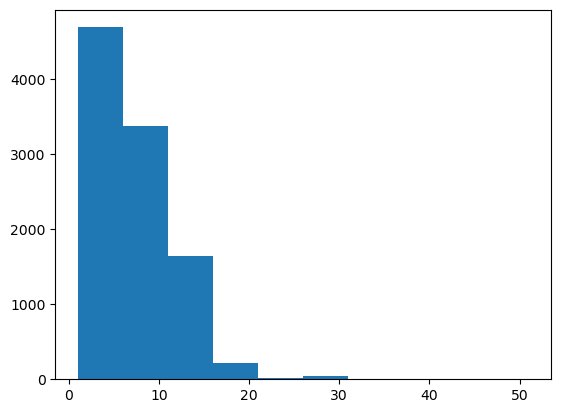

In [11]:
import matplotlib.pyplot as plt
plt.hist([len(t) for t in train_x + val_x])

In [12]:
def max_length(train, val):
    max_len = 0
    for tweet in train:
        if len(tweet) > max_len:
            max_len = len(tweet)
    for tweet in val:
        if len(tweet) > max_len:
            max_len = len(tweet)
    return max_len

max_len = max_length(train_x, val_x)
print("max length of a tweet is: ", max_len)

max length of a tweet is:  51


In [ ]:
%%sql


In [14]:
def padded_seq(tweet, vocab, max_length, unk_token ='[UNK]'):
    unk_id = vocab[unk_token]
    tensor = []
    for word in tweet:
        tensor.append(vocab[word]) if word in vocab.keys() else tensor.append(unk_id)
    pad_len = max_length - len(tensor)
    tensor = tensor + pad_len * [0]
    return tensor

print("padded sequence for the tweet ", all_pos_tweets[2277], " is ", padded_seq(all_pos_tweets[2277], vocabulary, max_len))

padded sequence for the tweet  ['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']  is  [288, 3943, 3618, 56, 420, 8, 3943, 1958, 55, 56, 85, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
train_x_padded = [padded_seq(tweet, vocabulary, max_len) for tweet in train_x]
val_x_padded = [padded_seq(tweet, vocabulary, max_len) for tweet in val_x]

print("first 10 padded sequences for train_x are: \n")
for i in range(0,10):
    print(i, "th index: ", train_x_padded[i] , "\n")

first 10 padded sequences for train_x are: 

0 th index:  [2, 3, 4, 5, 6, 7, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

1 th index:  [9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 8, 20, 21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

2 th index:  [22, 23, 24, 8, 25, 26, 27, 28, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

3 th index:  [29, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

4 th index:  [30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 8, 42, 43, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 

5 th index:  [44, 45, 8, 46, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Neural Network Setup 

In [21]:
import numpy as np

In [22]:
def relu(x):
    activation = np.maximum(x, 0)
    return activation

In [27]:
relu_test = np.array([[23.0, 8.0, -9.0, -32.0, -3.0, 5.0, -9.0, 109.0], [-2.0, 99.0, 23.5, -9.0, -9.0, -9.0, 9.0, 9.0]], dtype=float)
print("Test data is: ")
print(relu_test, "\n")
print("ReLU output is: ")
print(relu(relu_test))

Test data is: 
[[ 23.    8.   -9.  -32.   -3.    5.   -9.  109. ]
 [ -2.   99.   23.5  -9.   -9.   -9.    9.    9. ]] 

ReLU output is: 
[[ 23.    8.    0.    0.    0.    5.    0.  109. ]
 [  0.   99.   23.5   0.    0.    0.    9.    9. ]]


In [28]:
def sigmoid(x):
    activation = 1 / (1 + np.exp(-x))
    return activation

In [30]:
sigmoid_test = np.array([[23.0, 8.0, -9.0, -32.0, -3.0, 5.0, -9.0, 109.0], [-2.0, 99.0, 23.5, -9.0, -9.0, -9.0, 9.0, 9.0]], dtype=float)
print("Test data is: ")
print(sigmoid_test, "\n")
print("Sigmoid output is: ")
print(sigmoid(sigmoid_test))

Test data is: 
[[ 23.    8.   -9.  -32.   -3.    5.   -9.  109. ]
 [ -2.   99.   23.5  -9.   -9.   -9.    9.    9. ]] 

Sigmoid output is: 
[[1.00000000e+00 9.99664650e-01 1.23394576e-04 1.26641655e-14
  4.74258732e-02 9.93307149e-01 1.23394576e-04 1.00000000e+00]
 [1.19202922e-01 1.00000000e+00 1.00000000e+00 1.23394576e-04
  1.23394576e-04 1.23394576e-04 9.99876605e-01 9.99876605e-01]]


In [47]:
class Dense():
    def __init__(self, n_units, input_shape, activation, stdev=0.1, random_seed = 33):
        self.n_units = n_units
        self.random_generator = np.random.default_rng(seed = random_seed)
        self.activation = activation
        
        weight = self.random_generator.normal(scale=stdev, size=(input_shape[1],n_units))
        self.weights = weight
        
    def __call__(self, x):
        return self.forward(x)
    
    def forward(self, x):
        dense = np.dot(x,self.weights)
        dense = relu(dense)
        return dense

In [52]:
z = np.array([[2.0, 7.0, 25.0, -3.0, -45.0, 4.0]])
dense_layer = Dense(n_units=10, input_shape=z.shape, activation=relu)

print("Initial Weights are: \n", dense_layer.weights)
print("\nForward function output is: \n",dense_layer(z))

Initial Weights are: 
 [[ 0.039837   -0.05628233  0.05888349  0.00421181 -0.15709005  0.10016547
  -0.00978762  0.06198022  0.18368322  0.026843  ]
 [-0.10744687 -0.0680979   0.10168263 -0.14567682  0.02635893  0.03752645
  -0.11503044  0.01692639  0.05562222 -0.07727904]
 [-0.0480489   0.05437745 -0.12988968 -0.08801546  0.09538697  0.00856235
  -0.14161607  0.00113758  0.19412345 -0.15131565]
 [ 0.08159111  0.07587356 -0.01767848  0.06052824 -0.06741009  0.15447456
   0.17201638 -0.08800107 -0.02136539  0.01318832]
 [-0.06253683  0.03527009 -0.10375882  0.05773811 -0.0300666  -0.00487931
   0.04711217  0.09262512 -0.09836953  0.07893147]
 [ 0.08790771 -0.0115168   0.15377179 -0.0764599  -0.05454218  0.03820581
  -0.06803091  0.13926976  0.01980144  0.17195246]]

Forward function output is: 
 [[ 1.04733823  0.          2.91957294  0.          3.59206517  0.58604351
   0.          0.         10.17973912  0.        ]]


In [57]:
from tensorflow import keras

def build_model(vocab_size, embedding_size, max_len):
    
    tf.random.set_seed(33)
    
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_size, input_length=max_len),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [58]:
model = build_model(vocab_size=vocabulary_size, embedding_size=16, max_len=max_len)

print("Model ready")

Model ready


In [60]:
vocabulary_size

9162

In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 51, 16)            146592    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 146,609
Trainable params: 146,609
Non-trainable params: 0
_________________________________________________________________


In [62]:
from datetime import datetime

train_x_model_input = np.array(train_x_padded)
val_x_model_input = np.array(val_x_padded)
train_y_model_input = np.array(train_y)
val_y_model_input = np.array(val_y)

print("data prepped for training")

print("training: \n")

logdir = "logs/sa-nlp/model-" + datetime.now().strftime("%d%m%Y_%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

history = model.fit(train_x_model_input, train_y_model_input, epochs=25, validation_data=(val_x_model_input, val_y_model_input), callbacks= [tensorboard_callback])

data prepped for training
training: 

Epoch 1/25
250/250 [==============================] - 2s 5ms/step - loss: 0.0062 - accuracy: 0.9996 - val_loss: 0.0118 - val_accuracy: 0.9970
Epoch 2/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0056 - accuracy: 0.9998 - val_loss: 0.0110 - val_accuracy: 0.9970
Epoch 3/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0050 - accuracy: 0.9996 - val_loss: 0.0103 - val_accuracy: 0.9970
Epoch 4/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0045 - accuracy: 0.9998 - val_loss: 0.0101 - val_accuracy: 0.9965
Epoch 5/25
250/250 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9996 - val_loss: 0.0091 - val_accuracy: 0.9970
Epoch 6/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0037 - accuracy: 0.9998 - val_loss: 0.0094 - val_accuracy: 0.9960
Epoch 7/25
250/250 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.9996 - val_loss

In [63]:
%tensorboard --logdir logs

Launching TensorBoard...

In [67]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import re
import string

stopwords_english = stopwords.words('english')
stemmer = PorterStemmer()


def get_prediction(tweet, model, vocab, max_len):
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'https:?//[^\s\n\r]+', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tokens = tokenizer.tokenize(tweet)
    clean_tokens = []
    for word in tokens:
        if word not in stopwords_english and word not in string.punctuation:
            clean_tokens.append(stemmer.stem(word))
    
    input_sequence = padded_seq(clean_tokens, vocab, max_len)
    tweet = np.array([input_sequence])
    prediction = model.predict(tweet, verbose=False)
    return prediction[0][0]

In [69]:
unseen_tweet = 'Ram is a good boy'

prediction_unseen = get_prediction(unseen_tweet, model, vocabulary, max_len)
print(f"Model prediction on unseen tweet: {prediction_unseen}")

Model prediction on unseen tweet: 0.8048498630523682


## Embedding Weights 

In [71]:
embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

print(f"Weights of the embedding layer have shape :{embeddings.shape} corresponding to vocabulary size of: {vocabulary_size} and embedding size of: 16")

Weights of the embedding layer have shape :(9162, 16) corresponding to vocabulary size of: 9162 and embedding size of: 16


In [72]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
embeddings_2D = pca.fit_transform(embeddings)
print(f"dimensionality reduced from: {embeddings.shape} to: {embeddings_2D.shape}")

dimensionality reduced from: (9162, 16) to: (9162, 2)


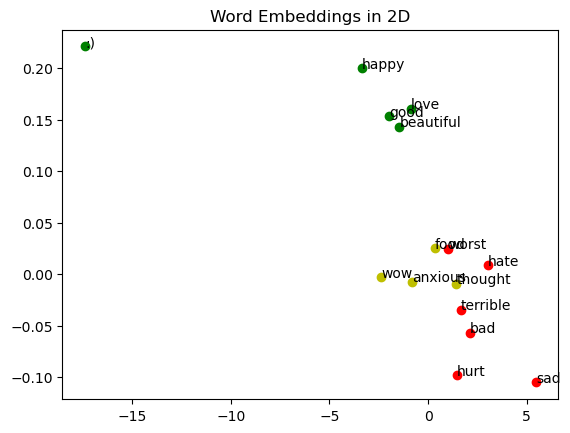

In [79]:
neg_words = ['bad', 'hurt', 'terrible', 'sad', 'hate', 'worst']
pos_words = ['good', 'happy', 'beautiful', 'love', ':)']
doubt_words = ['food', 'wow', 'anxious', 'thought']

neg_n = [vocabulary[stemmer.stem(w)] for w in neg_words]
pos_n = [vocabulary[stemmer.stem(w)] for w in pos_words]
dbt_n = [vocabulary[stemmer.stem(w)] for w in doubt_words]

plt.figure()

plt.scatter(embeddings_2D[neg_n][:,0], embeddings_2D[neg_n][:,1], color = 'r')
for i, txt in enumerate(neg_words):
    plt.annotate(txt, (embeddings_2D[neg_n][i,0], embeddings_2D[neg_n][i,1]))

plt.scatter(embeddings_2D[pos_n][:,0], embeddings_2D[pos_n][:,1], color = 'g')
for i, txt in enumerate(pos_words):
    plt.annotate(txt, (embeddings_2D[pos_n][i,0], embeddings_2D[pos_n][i,1]))

plt.scatter(embeddings_2D[dbt_n][:,0], embeddings_2D[dbt_n][:,1], color = 'y')
for i, txt in enumerate(doubt_words):
    plt.annotate(txt, (embeddings_2D[dbt_n][i,0], embeddings_2D[dbt_n][i,1]))
    
plt.title('Word Embeddings in 2D')

plt.show()

## Tensorboard Traceback Tutorial

In [31]:
import tensorflow as tf
%load_ext tensorboard

In [32]:
from datetime import datetime
from packaging import version

from tensorflow import keras

print("tensorflow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2

tensorflow version:  2.8.2


In [33]:
import tensorboard
tensorboard.__version__

'2.8.0'

In [36]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [39]:
(train_images, train_labels), _ = keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0

In [44]:
logdir = "logs/fit/" + datetime.now().strftime("%d%m%Y_%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

model.fit(train_images, train_labels, batch_size=64, epochs=5, callbacks=[tensorboard_callback])

Epoch 1/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3702 - accuracy: 0.8651
Epoch 2/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3689 - accuracy: 0.8660
Epoch 3/5
938/938 [==============================] - 3s 3ms/step - loss: 0.3630 - accuracy: 0.8675
Epoch 4/5
938/938 [==============================] - 2s 3ms/step - loss: 0.3615 - accuracy: 0.8674
Epoch 5/5
938/938 [==============================] - 2s 2ms/step - loss: 0.3580 - accuracy: 0.8694


In [46]:
%tensorboard --logdir logs

Launching TensorBoard...